In [1]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
image_size = 224

In [3]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [4]:
from tensorflow.keras.applications import ResNet50
from keras.layers import Input

Using TensorFlow backend.


In [5]:
 #image_input=Input(shape=(512, 128, 1, 1)) # input_tensor = image_input,
# (1, 1, 256, 512) and (512, 128, 1, 1) are incompatible
# weights = "resnet50_weights_tf_dim_ordering_tf_kernels.h5"
my_model = ResNet50()
my_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [15]:
from os.path import join

image_dir = "test/"
img_paths = [join(image_dir, filename) for filename in ['afgan_hound.jpg', 'rottweiler.jpg', 'whippet.jpg', 'indian-pariah-dog.jpg']]

In [16]:
test_data = read_and_prep_images(img_paths)

In [17]:
# https://www.kaggle.com/dansbecker/tensorflow-programming
preds = my_model.predict(test_data)

In [18]:
from decode_predictions import decode_predictions
from IPython.display import Image, display

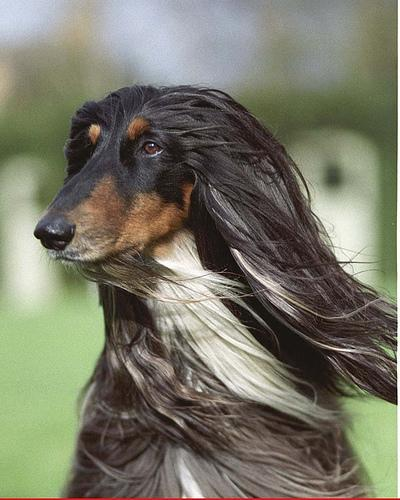

[('n02088094', 'Afghan_hound', 0.9759995), ('n02106030', 'collie', 0.008677375), ('n02091831', 'Saluki', 0.00659232)]


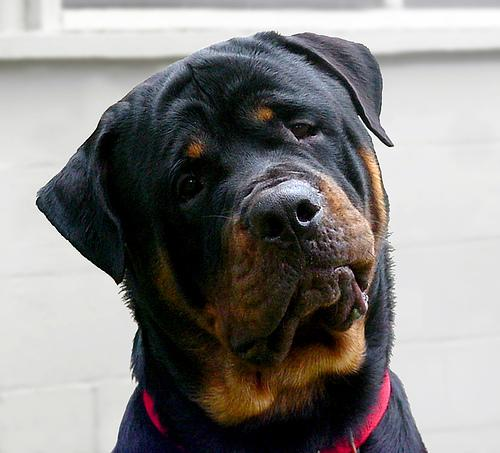

[('n02106550', 'Rottweiler', 0.99977404), ('n02107142', 'Doberman', 0.00016734793), ('n02089078', 'black-and-tan_coonhound', 3.6171205e-05)]


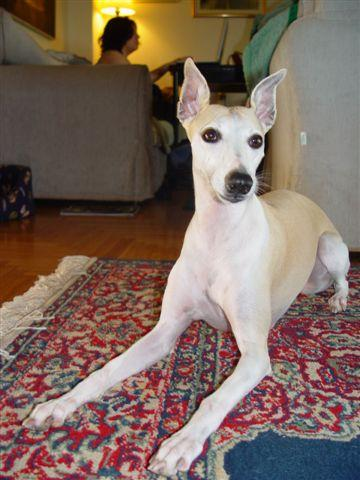

[('n02087046', 'toy_terrier', 0.5376594), ('n02085620', 'Chihuahua', 0.26936156), ('n02091032', 'Italian_greyhound', 0.047508746)]


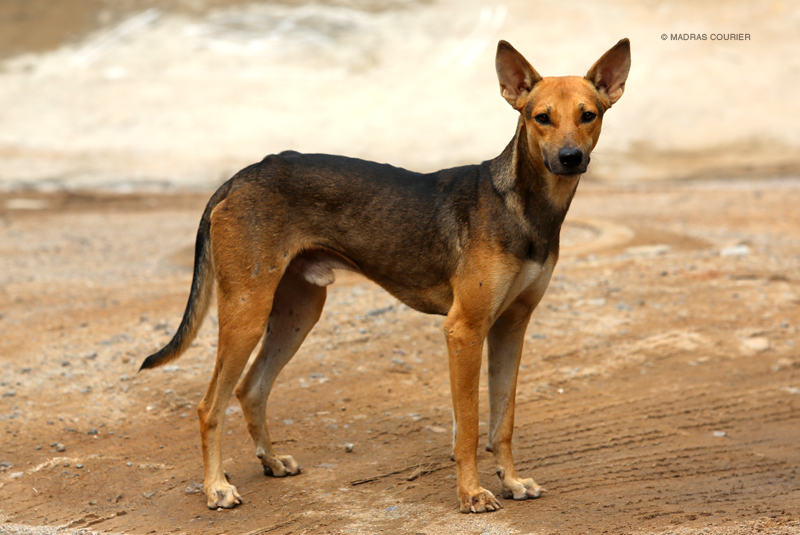

[('n02115641', 'dingo', 0.23616643), ('n02091244', 'Ibizan_hound', 0.21267113), ('n02105412', 'kelpie', 0.20609137)]


In [19]:
most_likely_labels = decode_predictions(preds, top=3, class_list_path='imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])